# **Collect Data**

In [ ]:
# LIBRARY
import zipfile
import shutil
import os

In [ ]:
os.makedirs("/root/.kaggle", exist_ok=True)
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")
os.chmod("/root/.kaggle/kaggle.json", 600)

In [ ]:
def download_and_extract(dataset_name, zip_filename, extract_to):
    print(f"\n📂 Downloading {dataset_name}...")
    os.system(f"kaggle datasets download -d {dataset_name}")
    print(f"🗁 Extracting {zip_filename}...")
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

In [ ]:
def count_files(folder_path):
    return len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

In [ ]:
def move_and_rename_files(root_dirs, category_map, base_data_dir='data', single_level=False):
    for src_cat, dst_cat in category_map.items():
        target_dir = os.path.join(base_data_dir, dst_cat)
        os.makedirs(target_dir, exist_ok=True)

        for split_name, root_path in root_dirs.items():
            source_dir = os.path.join(root_path, src_cat) if src_cat else root_path
            if not os.path.exists(source_dir):
                continue
            for i, filename in enumerate(os.listdir(source_dir)):
                src_file = os.path.join(source_dir, filename)
                if os.path.isfile(src_file):
                    prefix = split_name if not single_level else dst_cat.replace(" ", "_")
                    new_filename = f"{prefix}_{i}_{filename}" if prefix else f"{i}_{filename}"
                    dst_file = os.path.join(target_dir, new_filename)
                    shutil.move(src_file, dst_file)

        jumlah_file = count_files(target_dir)
        kategori_label = src_cat if src_cat else dst_cat
        print(f"📦 Semua file kategori '{kategori_label}' telah dipindahkan ke '{dst_cat}'")
        print(f"📸 Jumlah file di '{dst_cat}': {jumlah_file}\n")

In [ ]:
def move_files_from_list(source_dirs, target_dir):
    os.makedirs(target_dir, exist_ok=True)
    for src in source_dirs:
        prefix = os.path.basename(src)
        for i, filename in enumerate(os.listdir(src)):
            src_file = os.path.join(src, filename)
            if os.path.isfile(src_file):
                new_filename = f"{prefix}_{i}_{filename}"
                dst_file = os.path.join(target_dir, new_filename)
                shutil.move(src_file, dst_file)
    jumlah_file = count_files(target_dir)
    print(f"📦 Semua file dari {len(source_dirs)} folder telah dipindahkan ke '{target_dir}'")
    print(f"📸 Jumlah file di '{target_dir}': {jumlah_file}\n")

In [ ]:
def cleanup(paths):
    for path in paths:
        if os.path.isfile(path):
            os.remove(path)
        elif os.path.isdir(path):
            shutil.rmtree(path, ignore_errors=True)

In [ ]:
# Buat folder data jika belum ada
os.makedirs("data", exist_ok=True)

In [ ]:
# Dataset 1: garbage-classification-v2
download_and_extract("sumn2u/garbage-classification-v2", "garbage-classification-v2.zip", "garbage-dataset")

move_and_rename_files({"biological": "garbage-dataset/garbage-dataset"}, {"biological": "Sampah Makanan"}, single_level=True)
move_and_rename_files({"cardboard": "garbage-dataset/garbage-dataset"}, {"cardboard": "Kardus"}, single_level=True)

cleanup(['garbage-dataset', 'garbage-classification-v2.zip'])


📂 Downloading sumn2u/garbage-classification-v2...
🗁 Extracting garbage-classification-v2.zip...
📦 Semua file kategori 'biological' telah dipindahkan ke 'Sampah Makanan'
📸 Jumlah file di 'Sampah Makanan': 997

📦 Semua file kategori 'cardboard' telah dipindahkan ke 'Kardus'
📸 Jumlah file di 'Kardus': 1825



In [ ]:
# Dataset 2: custom-waste-classification-dataset
download_and_extract("wasifmahmood01/custom-waste-classification-dataset", "custom-waste-classification-dataset.zip", "custom-waste-classification-dataset")

move_and_rename_files(
    {
        'train': 'custom-waste-classification-dataset/wastes/train',
        'test': 'custom-waste-classification-dataset/wastes/test'
    },
    {
        "E-waste": "Elektronik",
        "battery waste": "Baterai",
        "glass waste": "Kaca",
        "light bulbs": "Lampu",
        "metal waste": "Logam",
        "paper waste": "Kertas",
        "plastic waste": "Plastik"
    }
)

cleanup(['custom-waste-classification-dataset', 'custom-waste-classification-dataset.zip'])


📂 Downloading wasifmahmood01/custom-waste-classification-dataset...
🗁 Extracting custom-waste-classification-dataset.zip...
📦 Semua file kategori 'E-waste' telah dipindahkan ke 'Elektronik'
📸 Jumlah file di 'Elektronik': 1561

📦 Semua file kategori 'battery waste' telah dipindahkan ke 'Baterai'
📸 Jumlah file di 'Baterai': 1061

📦 Semua file kategori 'glass waste' telah dipindahkan ke 'Kaca'
📸 Jumlah file di 'Kaca': 1278

📦 Semua file kategori 'light bulbs' telah dipindahkan ke 'Lampu'
📸 Jumlah file di 'Lampu': 525

📦 Semua file kategori 'metal waste' telah dipindahkan ke 'Logam'
📸 Jumlah file di 'Logam': 1539

📦 Semua file kategori 'paper waste' telah dipindahkan ke 'Kertas'
📸 Jumlah file di 'Kertas': 1713

📦 Semua file kategori 'plastic waste' telah dipindahkan ke 'Plastik'
📸 Jumlah file di 'Plastik': 1644



In [ ]:
# Dataset 3: pharmaceutical-and-biomedical-waste
download_and_extract("engineeringubu/pharmaceutical-and-biomedical-waste", "pharmaceutical-and-biomedical-waste.zip", "pharmaceutical-and-biomedical-waste")

move_files_from_list([
    "pharmaceutical-and-biomedical-waste/Pharmaceutical and Biomedical Waste (PBW)/Mask/Train images",
    "pharmaceutical-and-biomedical-waste/Pharmaceutical and Biomedical Waste (PBW)/Mask/Test images"
], "data/Masker")

cleanup(['pharmaceutical-and-biomedical-waste', 'pharmaceutical-and-biomedical-waste.zip'])


📂 Downloading engineeringubu/pharmaceutical-and-biomedical-waste...
🗁 Extracting pharmaceutical-and-biomedical-waste.zip...
📦 Semua file dari 2 folder telah dipindahkan ke 'data/Masker'
📸 Jumlah file di 'data/Masker': 529



In [ ]:
# Dataset 4: robin-base
download_and_extract("bahiskaraananda/robin-base", "robin-base.zip", "robin-base")

move_and_rename_files(
    {
        'train': 'robin-base/train',
        'test': 'robin-base/test',
        'val': 'robin-base/val'
    },
    {
        'daun': 'Daun',
        'tekstil': 'Pakaian'
    }
)

cleanup(['robin-base', 'robin-base.zip'])


📂 Downloading bahiskaraananda/robin-base...
🗁 Extracting robin-base.zip...
📦 Semua file kategori 'daun' telah dipindahkan ke 'Daun'
📸 Jumlah file di 'Daun': 3000

📦 Semua file kategori 'tekstil' telah dipindahkan ke 'Pakaian'
📸 Jumlah file di 'Pakaian': 3000



In [ ]:
# Dataset 5: recyclable-and-household-waste-classification
download_and_extract("alistairking/recyclable-and-household-waste-classification", "recyclable-and-household-waste-classification.zip", "recyclable-and-household-waste-classification-dataset")

move_files_from_list([
    "recyclable-and-household-waste-classification-dataset/images/images/styrofoam_food_containers/real_world",
    "recyclable-and-household-waste-classification-dataset/images/images/styrofoam_food_containers/default"
], "data/Sterofom")

cleanup(['recyclable-and-household-waste-classification-dataset', 'recyclable-and-household-waste-classification.zip', 'sample_data'])


📂 Downloading alistairking/recyclable-and-household-waste-classification...
🗁 Extracting recyclable-and-household-waste-classification.zip...
📦 Semua file dari 2 folder telah dipindahkan ke 'data/Sterofom'
📸 Jumlah file di 'data/Sterofom': 500



In [ ]:
# Cek jumlah ganbar perfolder
root_folder = 'data'  # folder utama skema 1
image_exts = {'.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff', '.webp'}

for category in os.listdir(root_folder):
    category_path = os.path.join(root_folder, category)
    if os.path.isdir(category_path):
        count = 0
        for filename in os.listdir(category_path):
            ext = os.path.splitext(filename)[1].lower()
            if ext in image_exts:
                count += 1
        print(f"📁 Folder: {category_path} - Jumlah gambar: {count}")

📁 Folder: data/Kertas - Jumlah gambar: 1713
📁 Folder: data/Daun - Jumlah gambar: 3000
📁 Folder: data/Plastik - Jumlah gambar: 1644
📁 Folder: data/Pakaian - Jumlah gambar: 3000
📁 Folder: data/Sterofom - Jumlah gambar: 500
📁 Folder: data/Masker - Jumlah gambar: 529
📁 Folder: data/Kaca - Jumlah gambar: 1278
📁 Folder: data/Elektronik - Jumlah gambar: 1561
📁 Folder: data/Lampu - Jumlah gambar: 525
📁 Folder: data/Baterai - Jumlah gambar: 1061
📁 Folder: data/Logam - Jumlah gambar: 1539
📁 Folder: data/Sampah Makanan - Jumlah gambar: 997
📁 Folder: data/Kardus - Jumlah gambar: 1825


# **Pre Processing Data**

## 1. Library

In [ ]:
import os
import shutil
import random
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from sklearn.model_selection import train_test_split
!pip install onnxruntime # Install the 'onnxruntime' package.
from PIL import Image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 99.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.0 MB/s eta 0:00:00


## 2. Load Gambar

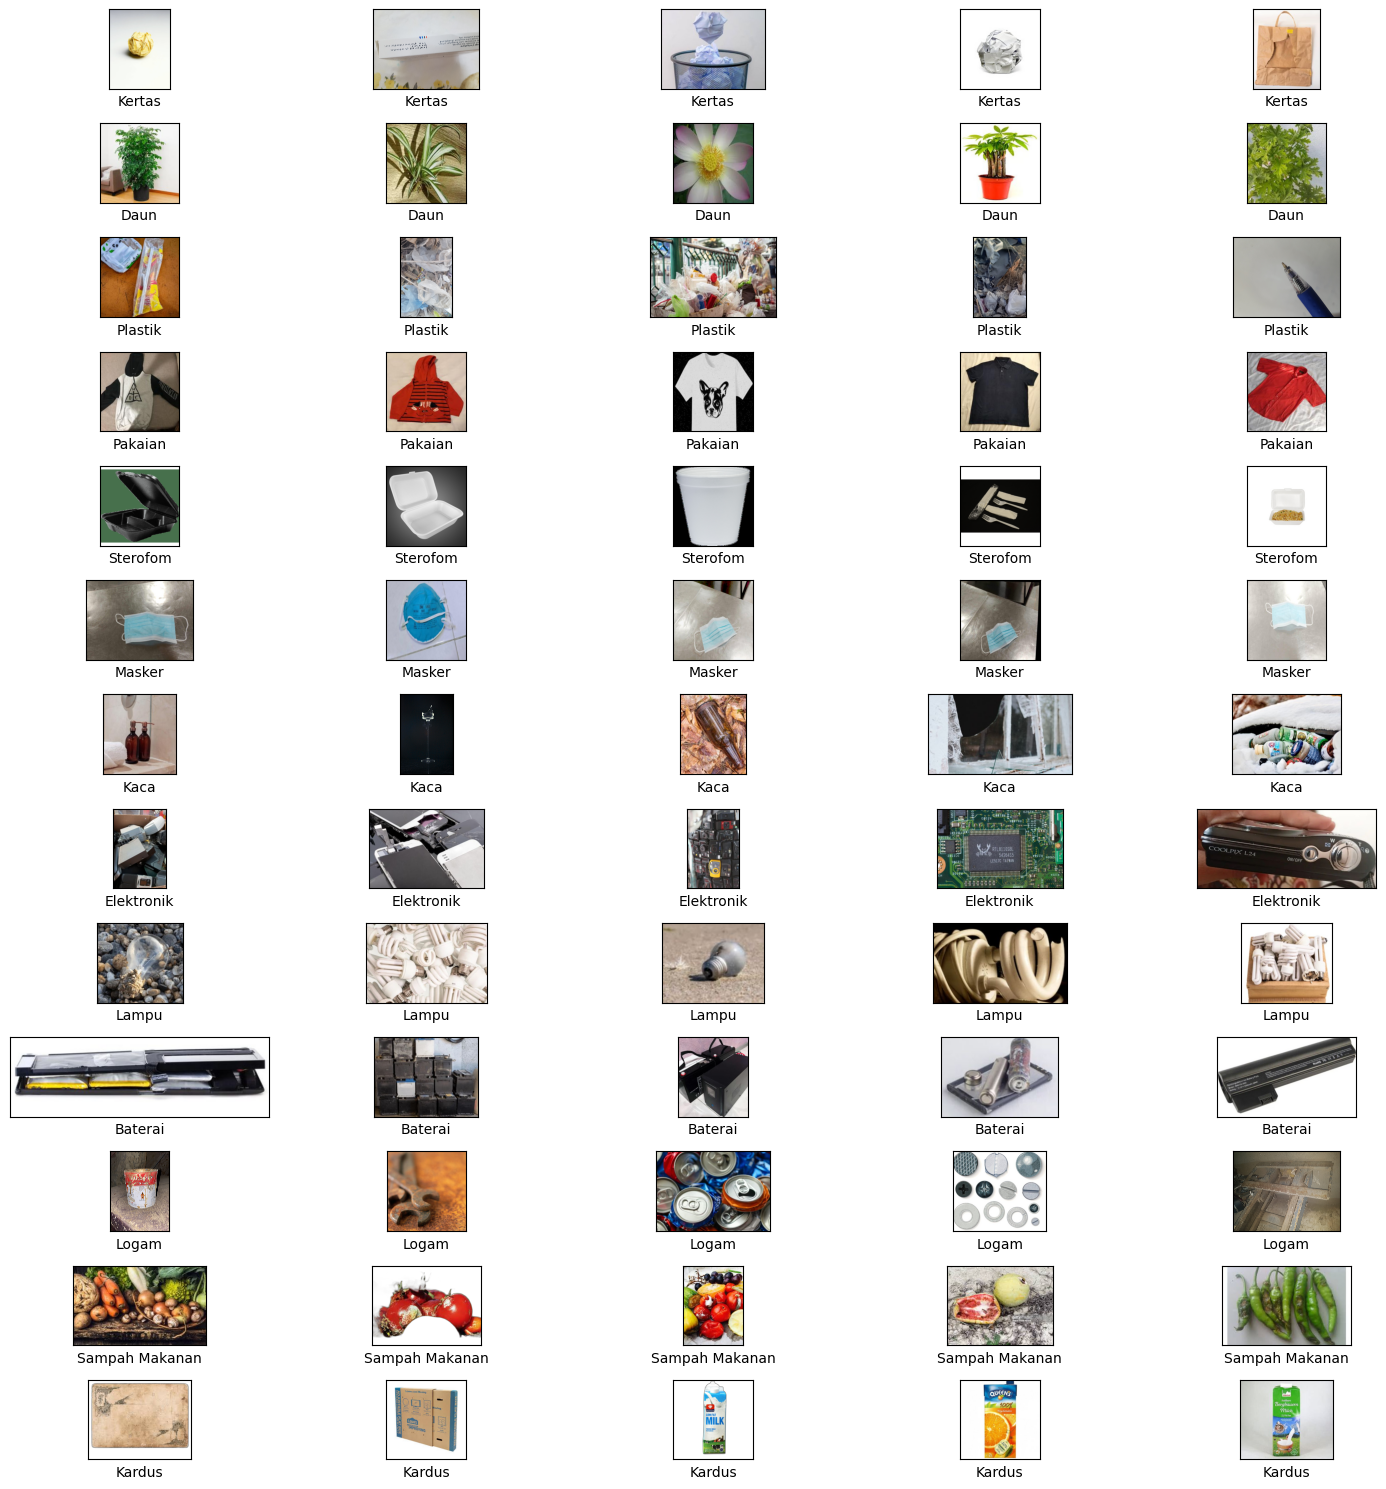

In [ ]:
# Membuat kamus yang menyimpan gambar untuk setiap kelas dalam data
garbage_image = {}

# Tentukan path sumber dataset
path = "/content/data"  # Ganti dengan path ke dataset Anda
path_sub = os.path.join(path)

# Menyimpan gambar dalam kamus berdasarkan kategori
for category in os.listdir(path_sub):
    garbage_image[category] = os.listdir(os.path.join(path_sub, category))

# Menampilkan secara acak 5 gambar di bawah setiap kelas
fig, axs = plt.subplots(len(garbage_image.keys()), 5, figsize=(15, 15))

for i, category_name in enumerate(garbage_image.keys()):
    images = np.random.choice(garbage_image[category_name], 5, replace=False)

    for j, image_name in enumerate(images):
        img_path = os.path.join(path_sub, category_name, image_name)
        img = Image.open(img_path)
        axs[i, j].imshow(img)
        axs[i, j].set(xlabel=category_name, xticks=[], yticks=[])

fig.tight_layout()
plt.show()

## 3. Definisi Fungsi Undersampling

In [ ]:
# Set random.seed = 42
random.seed(42)

# Fungsi undersample in-place (hapus file agar jumlah jadi 1500)
def undersample_inplace(category_dir, target_size=1500):
    images = [f for f in os.listdir(category_dir) if os.path.isfile(os.path.join(category_dir, f))]

    if len(images) <= target_size:
        print(f"Tidak perlu undersample di {category_dir}, jumlah gambar sudah <= {target_size}")
        return

    to_delete = random.sample(images, len(images) - target_size)

    for image in to_delete:
        os.remove(os.path.join(category_dir, image))

    print(f"✅ Undersample selesai untuk {category_dir}. {len(to_delete)} gambar dihapus.")

## 4. Definisi Fungsi Resize Gambar

In [ ]:
def resize_image(input_dir, output_dir, target_size=(224, 224)):
    for image_name in os.listdir(input_dir):
        image_path = os.path.join(input_dir, image_name)
        try:
            with Image.open(image_path) as img:
                if img.mode in ("RGBA", "P"):
                    img = img.convert("RGB")
                img = img.resize(target_size)
                img.save(os.path.join(output_dir, image_name), format="JPEG")
        except Exception as e:
            print(f"❌ Gagal resize {image_path}: {e}")

## 5. Definisi Fungsi Augmentasi

In [ ]:
import os
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

def augment_and_add_images(source_category_dir, target_category_dir, target_size=00):
    images = os.listdir(source_category_dir)
    existing_count = len(images)
    additional_images_needed = target_size - existing_count

    if additional_images_needed <= 0:
        print(f"✅ {source_category_dir} sudah cukup gambar (>= {target_size})")
        return

    datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    os.makedirs(target_category_dir, exist_ok=True)

    i = 0
    # Acak urutan gambar agar variasi lebih baik
    random.shuffle(images)

    while i < additional_images_needed:
        for image in images:
            if i >= additional_images_needed:
                break

            img_path = os.path.join(source_category_dir, image)
            try:
                img = load_img(img_path)

                if img.mode in ("RGBA", "P"):
                    img = img.convert("RGB")

                x = img_to_array(img)
                x = x.reshape((1,) + x.shape)

                # Hanya generate satu augmentasi per gambar per loop
                for batch in datagen.flow(x, batch_size=1):
                    augmented_image = array_to_img(batch[0])

                    if augmented_image.mode in ("RGBA", "P"):
                        augmented_image = augmented_image.convert("RGB")

                    save_path = os.path.join(target_category_dir, f"aug_{i}.jpg")
                    augmented_image.save(save_path, format="JPEG")

                    i += 1
                    break  # Lanjut ke gambar berikutnya

            except Exception as e:
                print(f"❌ Gagal augment {img_path}: {e}")

    print(f"✅ Augmentasi selesai. {i} gambar ditambahkan ke {target_category_dir}.")

## 6. Definisi Fungsi Splitting Data

In [ ]:
# Fungsi untuk Pembagian Dataset ke dalam Training, Validation, dan Test
def split_dataset(source_dir, target_dir, categories):
    for category in categories:
        category_dir = os.path.join(source_dir, category)

        images = os.listdir(category_dir)

        # Membagi data menjadi 80% training, 10% validation, 10% test
        train, test = train_test_split(images, test_size=0.2, random_state=42)
        val, test = train_test_split(test, test_size=0.5, random_state=42)

        # Membuat folder untuk training, validation, dan test di target_dir
        for split, data in zip(['train', 'val', 'test'], [train, val, test]):
            split_dir = os.path.join(target_dir, split, category)
            if not os.path.exists(split_dir):
                os.makedirs(split_dir)

            for image in data:
                shutil.copy(os.path.join(category_dir, image), os.path.join(split_dir, image))

    print("Pembagian dataset selesai: Training, Validation, dan Test.")

## 7. Main Program

### a. Sumber Directory

In [ ]:
source_dir = '/content/data'
target_dir = '/content/data_final'

categories = ['Masker', 'Baterai', 'Plastik', 'Lampu', 'Sterofom', 'Kaca',
              'Pakaian', 'Logam', 'Sampah Makanan', 'Elektronik', 'Kertas',
              'Daun', 'Kardus']

### b. Resize, Augmentasi, dan Pembagian Dataset

In [ ]:
for category in categories:
    source_category_dir = os.path.join(source_dir, category)
    target_category_dir = os.path.join(target_dir, category)

    os.makedirs(target_category_dir, exist_ok=True)

    # Salin gambar ke target folder dengan konversi ke RGB jika perlu
    for image_name in os.listdir(source_category_dir):
        image_path = os.path.join(source_category_dir, image_name)
        target_path = os.path.join(target_category_dir, image_name)

        try:
            with Image.open(image_path) as img:
                if img.mode in ("RGBA", "P"):
                    img = img.convert("RGB")
                    img.save(image_path, format="JPEG")  # overwrite as JPEG
        except Exception as e:
            print(f"❌ Gagal konversi {image_path}: {e}")

        shutil.copy(image_path, target_path)

    # Resize semua gambar
    resize_image(target_category_dir, target_category_dir, target_size=(224, 224))

    # Undersample atau augment sesuai jumlah gambar
    image_count = len(os.listdir(target_category_dir))
    if image_count > 1500:
        undersample_inplace(target_category_dir, target_size=1500)
    else:
        augment_and_add_images(target_category_dir, target_category_dir, target_size=1500)

✅ Augmentasi selesai. 971 gambar ditambahkan ke /content/data_final/Masker.
✅ Augmentasi selesai. 439 gambar ditambahkan ke /content/data_final/Baterai.
✅ Undersample selesai untuk /content/data_final/Plastik. 144 gambar dihapus.
✅ Augmentasi selesai. 975 gambar ditambahkan ke /content/data_final/Lampu.
✅ Augmentasi selesai. 1000 gambar ditambahkan ke /content/data_final/Sterofom.
✅ Augmentasi selesai. 222 gambar ditambahkan ke /content/data_final/Kaca.
✅ Undersample selesai untuk /content/data_final/Pakaian. 1500 gambar dihapus.
✅ Undersample selesai untuk /content/data_final/Logam. 39 gambar dihapus.
✅ Augmentasi selesai. 503 gambar ditambahkan ke /content/data_final/Sampah Makanan.
✅ Undersample selesai untuk /content/data_final/Elektronik. 61 gambar dihapus.
✅ Undersample selesai untuk /content/data_final/Kertas. 213 gambar dihapus.
✅ Undersample selesai untuk /content/data_final/Daun. 1500 gambar dihapus.
✅ Undersample selesai untuk /content/data_final/Kardus. 325 gambar dihapus.


In [ ]:
for category in os.listdir(target_dir):
    category_path = os.path.join(target_dir, category)
    if os.path.isdir(category_path):
        count = len([f for f in os.listdir(category_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
        print(f"📁 {category}: {count} gambar")

📁 Kertas: 1500 gambar
📁 Daun: 1500 gambar
📁 Plastik: 1500 gambar
📁 Pakaian: 1500 gambar
📁 Sterofom: 1500 gambar
📁 Masker: 1500 gambar
📁 Kaca: 1500 gambar
📁 Elektronik: 1500 gambar
📁 Lampu: 1500 gambar
📁 Baterai: 1500 gambar
📁 Logam: 1500 gambar
📁 Sampah Makanan: 1500 gambar
📁 Kardus: 1500 gambar


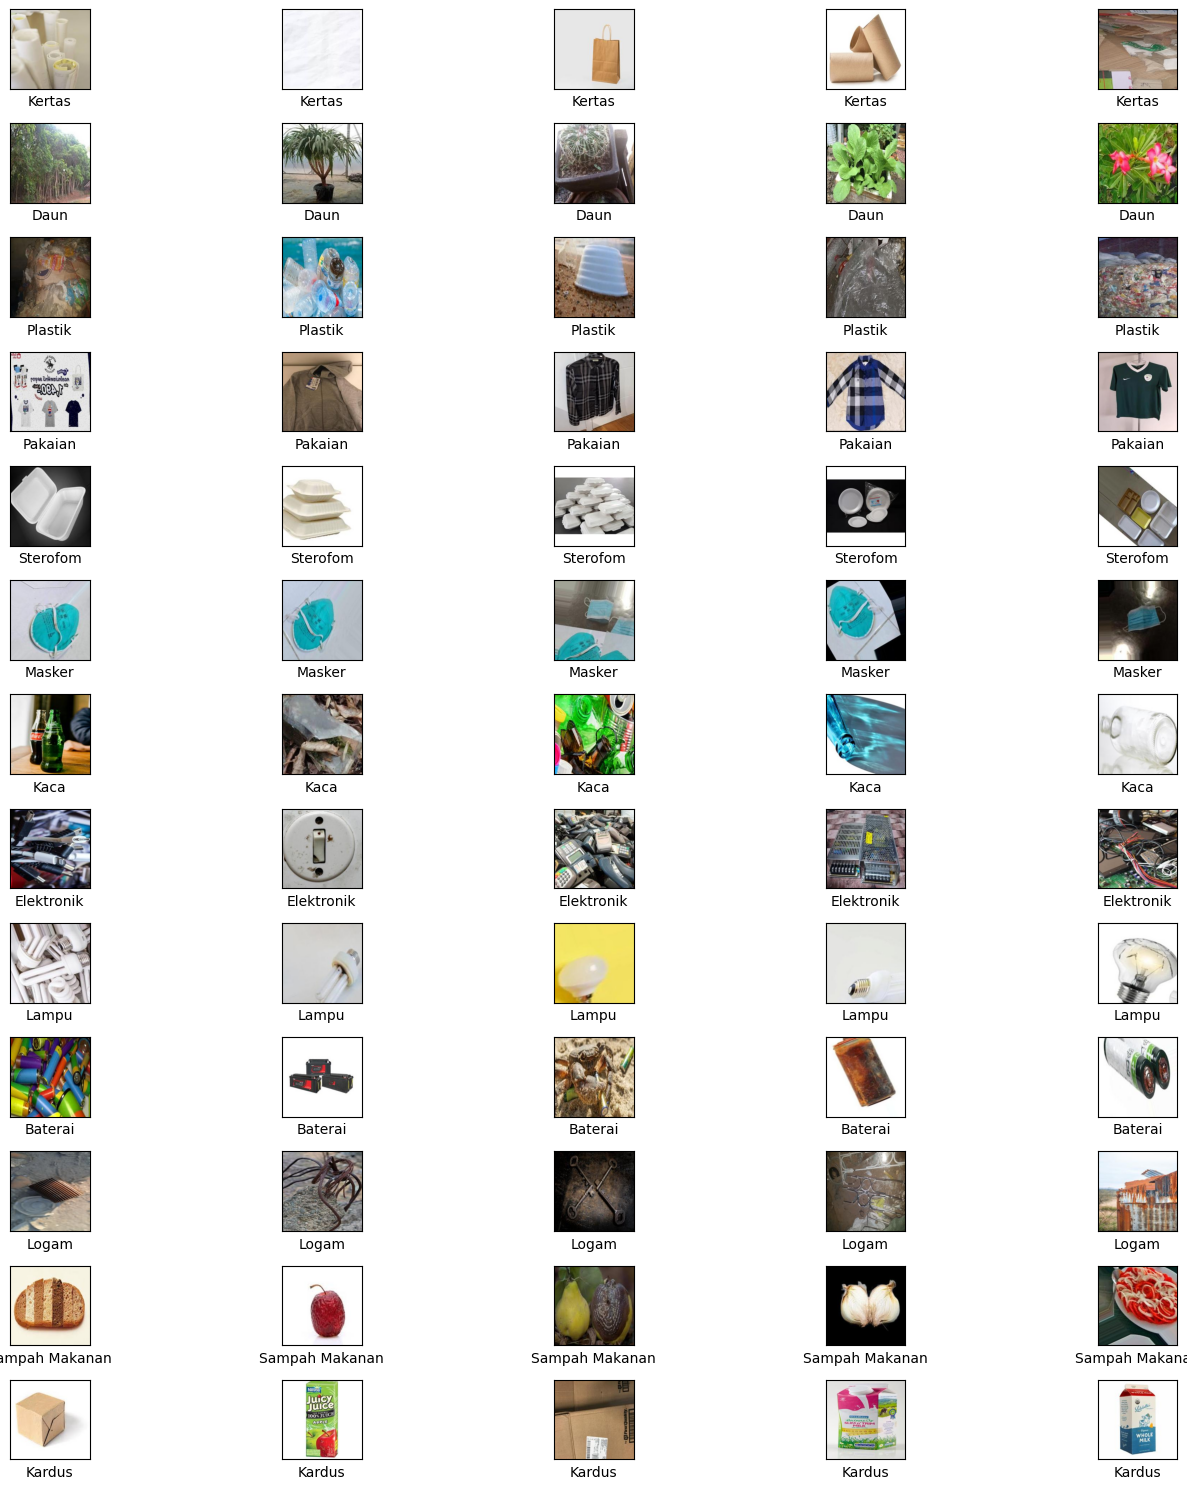

In [ ]:
# Membuat kamus yang menyimpan gambar untuk setiap kelas dalam data
garbage_image_final = {}

# Tentukan path sumber dataset
path = "/content/data_final"
path_sub = os.path.join(path)

# Menyimpan gambar dalam kamus berdasarkan kategori
for category in os.listdir(path_sub):
    garbage_image_final[category] = os.listdir(os.path.join(path_sub, category))

# Menampilkan secara acak 5 gambar di bawah setiap kelas
fig, axs = plt.subplots(len(garbage_image_final.keys()), 5, figsize=(15, 15))

for i, category_name in enumerate(garbage_image_final.keys()):
    images = np.random.choice(garbage_image_final[category_name], 5, replace=False)

    for j, image_name in enumerate(images):
        img_path = os.path.join(path_sub, category_name, image_name)
        img = Image.open(img_path)
        axs[i, j].imshow(img)
        axs[i, j].set(xlabel=category_name, xticks=[], yticks=[])

fig.tight_layout()
plt.show()

### c. Pembagian Dataset

In [ ]:
data_final_split = '/content/data_final_split'  # Ganti sesuai kebutuhan
# Membuat folder jika belum ada
os.makedirs(data_final_split, exist_ok=True)

In [ ]:
# Pembagian dataset menjadi training, validation, dan test
split_dataset(source_dir=target_dir, target_dir=data_final_split, categories=categories)

Pembagian dataset selesai: Training, Validation, dan Test.


In [ ]:
# zip file /data_final
!zip -r /content/data_final_split.zip /content/data_final_split

Streaming output truncated to the last 5000 lines.
  adding: content/data_final_split/train/Lampu/train_265_lightbulb (146).jpg (deflated 3%)
  adding: content/data_final_split/train/Lampu/aug_435.jpg (deflated 3%)
  adding: content/data_final_split/train/Lampu/aug_945.jpg (deflated 3%)
  adding: content/data_final_split/train/Lampu/aug_959.jpg (deflated 6%)
  adding: content/data_final_split/train/Lampu/aug_509.jpg (deflated 3%)
  adding: content/data_final_split/train/Lampu/aug_214.jpg (deflated 2%)
  adding: content/data_final_split/train/Lampu/aug_647.jpg (deflated 4%)
  adding: content/data_final_split/train/Lampu/test_18_light bulb waste (99).jpg (deflated 2%)
  adding: content/data_final_split/train/Lampu/aug_706.jpg (deflated 2%)
  adding: content/data_final_split/train/Lampu/aug_204.jpg (deflated 2%)
  adding: content/data_final_split/train/Lampu/train_126_lightbulb (241).jpg (deflated 2%)
  adding: content/data_final_split/train/Lampu/train_17_lightbulb (400).jpg (deflated 5%